Note: Need to activate "geospatial" conda environment for this to work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely.geometry
%matplotlib inline

In [2]:
df = pd.read_pickle('run-20190309T074904-dataframe.pkl')
df.head()

,altitude,calories,distance,heart_rate,position_lat,position_long,speed
timestamp,,,,,,,
2019-03-09 07:49:03,168.6,0.0,0.0,91.0,53.650281,-1.811941,0.00
2019-03-09 07:49:04,168.6,0.0,0.0,91.0,53.650283,-1.811939,0.03
2019-03-09 07:49:05,168.6,0.0,0.0,91.0,53.650286,-1.811937,0.07
2019-03-09 07:49:06,168.6,0.0,0.0,92.0,53.650290,-1.811935,0.16
2019-03-09 07:49:07,168.6,0.0,0.0,94.0,53.650293,-1.811933,0.28


## Convert pandas df to geopandas df

In [3]:
df['Coordinates'] = list(zip(df.position_long, df.position_lat))
df['Coordinates'] = df['Coordinates'].apply(shapely.geometry.Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.crs = {'init': 'epsg:4326'}   # set coordinate reference system
gdf.head()

,altitude,calories,distance,heart_rate,position_lat,position_long,speed,Coordinates
timestamp,,,,,,,,
2019-03-09 07:49:03,168.6,0.0,0.0,91.0,53.650281,-1.811941,0.00,POINT (-1.811940986663103 53.65028098225594)
2019-03-09 07:49:04,168.6,0.0,0.0,91.0,53.650283,-1.811939,0.03,POINT (-1.811938975006342 53.6502829939127)
2019-03-09 07:49:05,168.6,0.0,0.0,91.0,53.650286,-1.811937,0.07,POINT (-1.811936963349581 53.65028601139784)
2019-03-09 07:49:06,168.6,0.0,0.0,92.0,53.650290,-1.811935,0.16,POINT (-1.811935035511851 53.65029003471136)
2019-03-09 07:49:07,168.6,0.0,0.0,94.0,53.650293,-1.811933,0.28,POINT (-1.81193302385509 53.65029296837747)


In [4]:
# Drop old latitude / longitude columns
gdf.drop(['position_lat', 'position_long'], axis=1, inplace=True)

## Visualisation

In [25]:
import contextily
w, s, e, n = gdf.total_bounds
print(w, s, e, n)
_ = contextily.howmany(w, s, e, n, 14, ll=True)

-1.84288303368 53.6492309812 -1.8094219733 53.6629990116
Using zoom level 14, this will download 4 tiles


In [26]:
%time img, ext = contextily.bounds2img(w, s, e, n, 14, ll=True)

Wall time: 685 ms


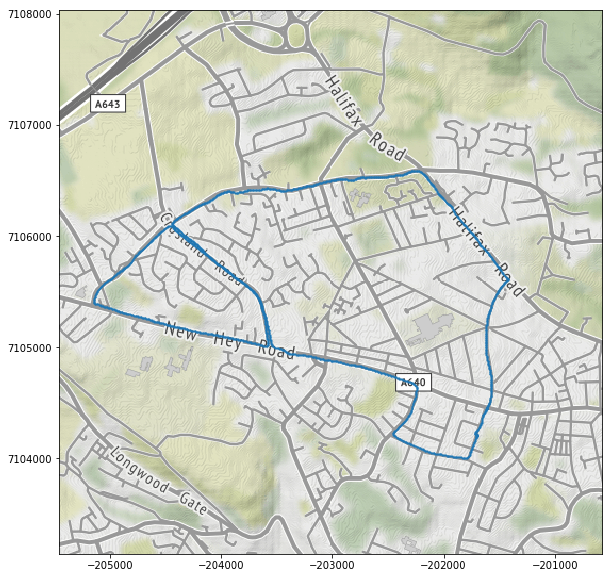

In [27]:
ax = gdf.to_crs(epsg=3857).plot(figsize=(10,10), markersize=1)
#contextily.add_basemap(ax)
ax.imshow(img, extent=ext)
plt.show()